In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from tqdm import tqdm

# import RSHE.py
# numba was used in RSHE.py to accelerate the calculation
from RSHE import RSHEscore

## load data

In [2]:
filename = 'data.mat'
epsilon = loadmat(filename)['epsilon']
n_element = epsilon.shape[0]

## Calculate anisotropic score

In [3]:
n_frame = epsilon.shape[3]
strain = np.arange(n_frame)/(n_frame-1)*0.05
p = np.zeros((n_element,5,n_frame))
p_ave = np.zeros((5,n_frame))
p_std = np.zeros((5,n_frame))

In [4]:
for it in tqdm(range(n_frame)):
    epsilon_t = epsilon[:,:,:,it].reshape(n_element,4)
    
    for ie in range(n_element):
        p[ie,:,it] = RSHEscore(epsilon_t[ie,[0,3,1]]) # xx, yy, xy
        
    p_ave[:,it] = np.mean(p[:,:,it],axis=0)
    p_std[:,it] = np.std(p[:,:,it],axis=0)

100%|██████████| 41/41 [00:04<00:00, 10.00it/s]


In [5]:
from scipy.io import savemat
mdic = {'p':p, 'p_ave':p_ave, 'p_std':p_std}
filename_export = 'diversity.mat'
savemat(filename_export, mdic)

## Plot the result

In [6]:
p_ave = loadmat(filename_export)['p_ave']
p_std = loadmat(filename_export)['p_std']

In [7]:
import matplotlib.pyplot as plt

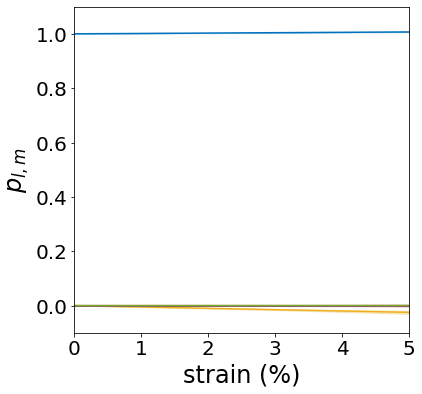

In [8]:
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)

colors = [[0, 0.4470, 0.7410],
          [0.8500, 0.3250, 0.0980],
          [0.9290, 0.6940, 0.1250],
          [0.4940, 0.1840, 0.5560],
          [0.4660, 0.6740, 0.1880]]

for i in range(5):
    ax.fill_between(strain*100,p_ave[i,:]+p_std[i,:],p_ave[i,:]-p_std[i,:],color=colors[i],alpha=0.25)
    ax.plot(strain*100,p_ave[i,:],'-',color=colors[i])
    
ax.set_xlim(0, 5)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('strain (%)',fontsize=24)
ax.set_ylabel('$p_{l,m}$',fontsize=24)
ax.tick_params(which='both', labelsize=20)

pngname = 'diversity.png'
plt.savefig(pngname, dpi=96, bbox_inches='tight')

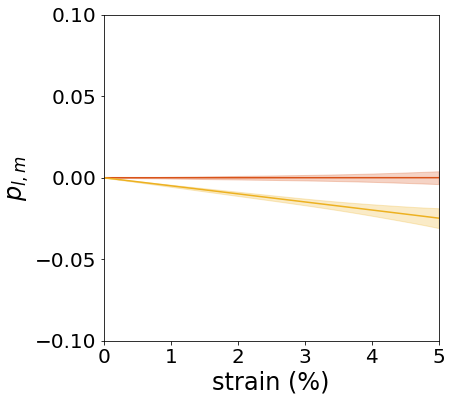

In [9]:
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)

colors = [[0, 0.4470, 0.7410],
          [0.8500, 0.3250, 0.0980],
          [0.9290, 0.6940, 0.1250],
          [0.4940, 0.1840, 0.5560],
          [0.4660, 0.6740, 0.1880]]

# for i in range(5):
for i in [0,1,2]:
    ax.fill_between(strain*100,p_ave[i,:]+p_std[i,:],p_ave[i,:]-p_std[i,:],color=colors[i],alpha=0.25)
    ax.plot(strain*100,p_ave[i,:],'-',color=colors[i])
    
ax.set_xlim(0, 5)
ax.set_ylim(-0.1, 0.1)
ax.set_yticks([-1e-1, -5e-2, 0, 5e-2, 1e-1])
ax.set_xlabel('strain (%)',fontsize=24)
ax.set_ylabel('$p_{l,m}$',fontsize=24)
ax.tick_params(which='both', labelsize=20)

pngname = 'diversity_zoom.png'
plt.savefig(pngname, dpi=96, bbox_inches='tight')

rho = -0.0850


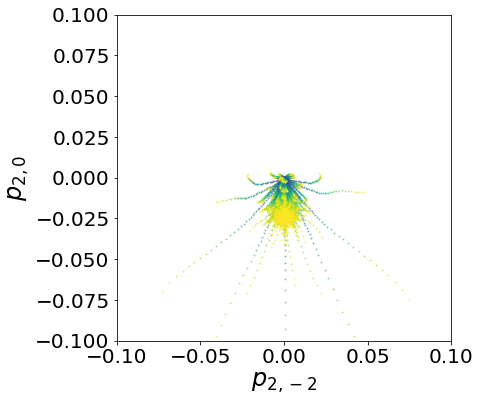

In [11]:
from matplotlib import cm
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)

colors = cm.viridis(np.linspace(0, 1, 41))

for i in range(41):
    ax.plot(p[::1,1,i].T,p[::1,2,i].T,'.',color=colors[i],alpha=0.5,markersize=2)
    
corr = np.corrcoef(p[::1,1,i],p[::1,2,i])
print('rho = {:0.4f}'.format(corr[0,1]))
    
ax.set_xlim(-.1, .1)
ax.set_ylim(-.1, .1)
# ax.set_yticks([-1e-1, -5e-2, 0, 5e-2, 1e-1])
ax.set_xlabel('$p_{2,-2}$',fontsize=24)
ax.set_ylabel('$p_{2,2}$',fontsize=24)
ax.tick_params(which='both', labelsize=20)

pngname = 'corr.png'
plt.savefig(pngname, dpi=96, bbox_inches='tight')

In [21]:
np.sqrt(np.sum(p_std[1:3,-1]**2)/2)

0.005127400963831054